In [1]:
from datetime import datetime, date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pandas as pd
import openpyxl as excel
import glob

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Note: Limiting Lags to 70

def entries_clean(entries):
    
    entries = entries.rename(columns={
        'Timestamp': 'Time',
        'glucose': 'Glucose'
    })
    
    entries.index = pd.to_datetime(entries["Time"], format='%Y-%m-%d %H:%M:%S')


    entries = entries[~entries.index.duplicated(keep='first')]

    # Replace infinite updated data with nan
    entries.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Drop rows with NaN
    entries.dropna(inplace=True)

    entries = entries[entries['Glucose'].astype(int) >
                      39]  # remove everything less than 39
    entries = entries[entries['Glucose'].astype(int) <
                      1000]  # remove everything greater than 40
    entries['Glucose'].values[
        entries['Glucose'] >
        400] = 400  # anything greater than 400 replace with 400
    
    return entries

In [2]:
path = r'C:\Users\arsal\OneDrive\Desktop\OPEN\EPI-GV\glucose'

extension = 'csv'
os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

p1 = os.path.join(path, files[0])

p2 = os.path.join(path, files[1])

entries1 = pd.read_csv(p1, index_col=None, na_values=" null")

entries1 = entries_clean(entries1)

print(entries1)

entries2 = pd.read_csv(p2, index_col=None, na_values=" null")

entries2 = entries_clean(entries2)

print(entries2)


                                            Time  Glucose
Time                                                     
2021-11-27 23:55:57.000  2021-11-27 23:55:57.000    107.0
2021-11-27 23:50:58.952  2021-11-27 23:50:58.952    135.0
2021-11-27 23:50:58.000  2021-11-27 23:50:58.000    135.0
2021-11-27 23:45:58.952  2021-11-27 23:45:58.952    158.0
2021-11-27 23:45:57.000  2021-11-27 23:45:57.000    158.0
...                                          ...      ...
2021-10-27 13:47:42.902  2021-10-27 13:47:42.902    106.0
2021-10-27 13:45:37.000  2021-10-27 13:45:37.000     99.0
2021-10-27 13:42:42.327  2021-10-27 13:42:42.327    109.0
2021-10-27 13:40:37.000  2021-10-27 13:40:37.000    106.0
2021-10-27 13:35:37.000  2021-10-27 13:35:37.000    112.0

[13817 rows x 2 columns]
                                            Time  Glucose
Time                                                     
2022-02-01 23:56:51.000  2022-02-01 23:56:51.000      109
2022-02-01 23:51:53.137  2022-02-01 23:51:53.1

Partial autocorrelations pre-pert
[ 1.00000000e+00  9.86089120e-01 -1.76534063e-01 -4.30504496e-01
  2.11163429e-02 -4.89398781e-02  1.38037687e-03 -3.37431229e-03
  9.99887093e-03  1.57257088e-02 -6.71247920e-03 -4.70726493e-03
 -1.73686013e-03  1.37154121e-02  1.74618285e-03  2.93297710e-02
  2.10101587e-03  3.56473718e-02  1.55888285e-02 -4.71032256e-03
 -1.27681810e-02  3.46221579e-03 -1.22980924e-02  2.52249556e-02
  4.68040380e-03  1.81749029e-02  6.12883765e-04 -2.66659443e-03
  8.47948447e-03  1.02291443e-02 -6.05678122e-03  1.13661047e-02
 -1.87607132e-03 -6.48571766e-03 -2.27129692e-02  1.86468844e-02
 -7.45962898e-03  1.55170325e-02 -1.32893626e-02  1.26155121e-02
 -2.61542999e-04]


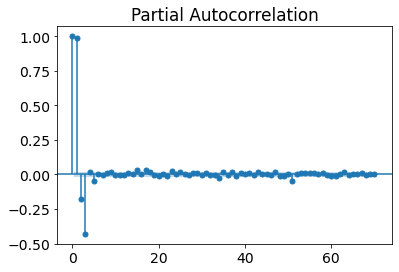

Partial autocorrelations post-pert
[ 1.          0.98620691 -0.13212812 -0.3772255   0.02263091 -0.06254934
  0.00675112 -0.02817859 -0.0071784   0.01357479  0.00408884  0.01693099
 -0.01592938 -0.00155465 -0.01949621  0.01156598 -0.01148186  0.02922635
 -0.01535351  0.01930243  0.00270313  0.03216223 -0.01279489  0.03518546
 -0.00551998  0.00955827 -0.00982931  0.01058459 -0.01051265  0.03174335
  0.0121926   0.01894834 -0.02261651 -0.00307868  0.00975057  0.02846443
 -0.02665904 -0.00545841 -0.01394799  0.00918631 -0.02170922]


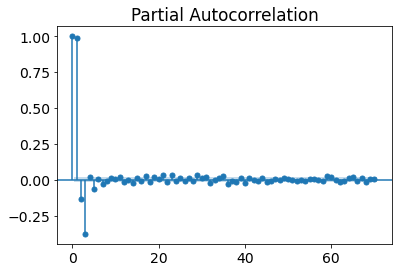

Autocorrelations pre-pert
[1.         0.98601775 0.96735438 0.93665038 0.90381696 0.86531845
 0.82630901 0.78523832 0.74496539 0.70497645 0.6663164  0.62875167
 0.59274453 0.55852084 0.5260451  0.49605712 0.46792993 0.44283052
 0.41990674 0.39946584 0.38055521 0.36356264 0.34748466 0.33329029
 0.31995949 0.308398   0.29757263 0.28797564 0.27911204 0.27131489
 0.26395065 0.25745962 0.25119509 0.24528927 0.23894612 0.23305167
 0.226686   0.22090612 0.21458864 0.20887858 0.20283243]


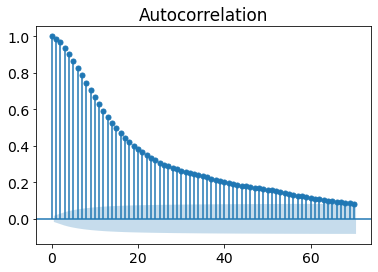

Autocorrelations post-pert
[1.         0.98613627 0.96884549 0.94122117 0.91251103 0.87902286
 0.84564757 0.81007585 0.77502319 0.73980239 0.70568579 0.67263385
 0.64056421 0.60971926 0.57952035 0.55082357 0.52274174 0.49674109
 0.47127937 0.44797618 0.42547408 0.40547864 0.38613349 0.36950229
 0.35353534 0.33974866 0.32636832 0.31473088 0.30326861 0.29368443
 0.28470452 0.27743702 0.27019952 0.26386681 0.25779093 0.25290381
 0.24776349 0.24310079 0.23794651 0.23305157 0.22738268]


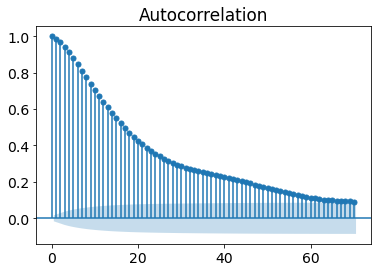

In [6]:
acf_values1 = acf(entries1['Glucose'])
pacf_values1 = pacf(entries1['Glucose'])

acf_values2 = acf(entries2['Glucose'])
pacf_values2 = pacf(entries2['Glucose'])

    
print("Partial autocorrelations pre-pert")
print(pacf_values1)
plot_pacf(entries1['Glucose'], lags=70)
plt.show()

print("Partial autocorrelations post-pert")
print(pacf_values2)
plot_pacf(entries2['Glucose'], lags=70)
plt.show()

print("Autocorrelations pre-pert")
print(acf_values1)
plot_acf(entries1['Glucose'], lags=70)
plt.show()

print("Autocorrelations post-pert")
print(acf_values2)
plot_acf(entries2['Glucose'], lags=70)
plt.show()